# DiffDock, state-of-the-art method for molecular docking

A step-by-step guide on how to use DiffDock, including setting up the environment and running various molecular docking simulations.

*Part 1 in the series "Small Molecule Docking Predictions using PLEX"*

---

This section provides an introduction to DiffDock, its applications, and its importance in the field of bioinformatics and computational biology.

[DiffDock: Diffusion Steps, Twists, and Turns for Molecular Docking (2023)](https://arxiv.org/abs/2210.01776)

Molecular docking has primarily been treated as a regression problem in recent deep learning approaches. These methods have managed to decrease runtime compared to traditional search-based methods, but have not significantly improved accuracy.

The creators of DiffDock propose a different approach. They frame molecular docking as a generative modeling problem, a employ a diffusion generative model over the non-Euclidean manifold of ligand poses. They map this manifold to the product space of the degrees of freedom (translational, rotational, and torsional) involved in docking and develop an efficient diffusion process on this space.

Empirically, DiffDock achieves a 38% top-1 success rate (RMSD < 2A) on PDBBind, significantly outperforming the previous state-of-the-art of traditional docking (23%) and deep learning (20%) methods. Moreover, while previous methods are not able to dock on computationally folded structures (maximum accuracy 10.4%), DiffDock maintains significantly higher precision (21.7%).

Finally, DiffDock has fast inference times and provides confidence estimates with high selective accuracy.

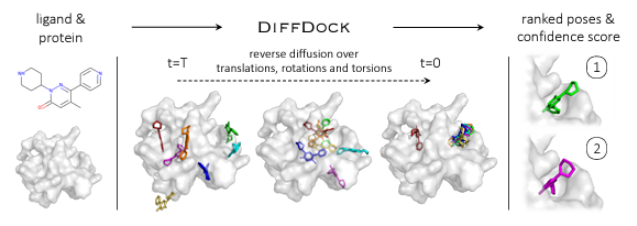

"**Overview of DiffDock.** Left: The model takes as input the separate ligand and protein structures. Center: Randomly sampled initial poses are denoised via a reverse diffusion over translational, rotational, and torsional degrees of freedom. Right: The sampled poses are ranked by the confidence model to produce a final prediction and confidence score."
https://doi.org/10.48550/arXiv.2210.01776

---


### Caveats
While the paper "DiffDock: Diffusion Steps, Twists, and Turns for Molecular Docking" presents a novel and promising approach to molecular docking, there are several potential counterpoints that could be raised:

1. **Assumption of Known Holo-Structure:** DiffDock assumes access to the bound structure of the protein, known as the holo-structure. In real-world scenarios, researchers often only have access to the unbound apo protein structure or the holo structure of the protein bound to a different ligand. This could limit the applicability of DiffDock in practical settings.

2. **Lack of Protein Flexibility Modeling:** The authors acknowledge that to fully model binding to apo structures, one needs to additionally model protein flexibility, which is not currently done by DiffDock. This could be a significant limitation as protein flexibility can play a crucial role in ligand binding.

3. **Dependence on GPU for Speed:** The authors highlight that DiffDock is 3 to 12 times faster than the best search-based method when run on a GPU. However, not all research settings have access to such computational resources, which could limit the widespread adoption of DiffDock.

4. **Limited Evaluation:** While the authors have tested DiffDock on the PDBBind dataset and against computationally generated apo-structures, it would be beneficial to see how DiffDock performs on a wider variety of datasets and real-world scenarios.

5. **Need for More Independent Validation:** The paper presents impressive results, but these need to be independently validated by other researchers in the field. It's also important to see how DiffDock performs when integrated into a full drug discovery pipeline.

6. **Complexity of the Model:** The model's complexity, including the use of diffusion generative models and the need for specific training and inference procedures, could make it difficult for other researchers to implement and use DiffDock. This could limit its adoption in the broader scientific community.

These caveats do not necessarily detract from the significant contributions of the paper, but they do highlight areas where further research and development could be beneficial.

### Impact
The paper "DiffDock: Diffusion Steps, Twists, and Turns for Molecular Docking" presents a significant advancement in the field of molecular docking, a crucial task in computational drug design. The potential impact of this paper can be summarized as follows:

* **Improved Accuracy:** By treating molecular docking as a generative modeling problem, DIFFDOCK achieves a 38% top-1 success rate on the PDBBind blind docking benchmark, significantly surpassing the previous best search-based and deep learning methods. This improved accuracy could lead to more effective drug design efforts.

* **Faster Inference Times:** DIFFDOCK is 3 to 12 times faster than the best search-based method when run on a GPU. This speed increase could make high-throughput virtual screening for drug candidates or reverse screening for protein targets more feasible and efficient.

* **Confidence Estimates:** DIFFDOCK provides accurate confidence scores for its predictions, which could help researchers prioritize certain drug candidates over others.

* **Generalization to Imperfect Structures:** DIFFDOCK maintains a large proportion of its accuracy when run on computationally folded protein structures. This ability to generalize to imperfect structures could make it a valuable tool in real-world scenarios where perfect protein structures are not always available.

* **Potential for Further Research:** The novel approach presented in this paper could inspire further research into generative modeling for molecular docking and other related tasks.

In summary, the potential impact of this paper is significant, with the potential to improve the efficiency and effectiveness of computational drug design efforts.

### "Top-1" Success Rate on the PDBBInd Blind Docking Benchmark
The top-1 success rate on the PDBBind blind docking benchmark refers to the percentage of test cases in which the best (top-1) predicted pose of a ligand was within a certain threshold of the actual pose in the crystal structure.

In the context of this paper, the authors define success as having a root-mean-square deviation (RMSD) of less than 2 Ångstroms (2A). The RMSD is a measure of the average distance between the atoms of superimposed proteins. In molecular docking, a lower RMSD indicates a better match between the predicted and actual pose. So, a top-1 success rate of 38% means that in 38% of the test cases, the best predicted pose of the ligand was very close (less than 2A RMSD) to the actual pose in the crystal structure. This is a significant achievement, as it shows that the model's top prediction is correct in a high proportion of cases.

In the context of molecular docking, a top-1 success rate of 38% is indeed significant and useful. It's important to understand that molecular docking is a complex task with a vast search space. The ligand can adopt an almost infinite number of poses within the binding pocket of the protein, and even small changes in pose can lead to significant differences in binding affinity. Given this complexity, a success rate of 38% for the top prediction is a substantial achievement. It means that in more than one-third of cases, the model's top prediction for the ligand's pose is within a very close range (less than 2 Ångstroms RMSD) of the actual pose in the crystal structure.

Furthermore, this 38% success rate is significantly higher than the success rates achieved by previous state-of-the-art methods, indicating a substantial improvement in prediction accuracy.

*Note: while a 38% success rate is impressive in this context, it also means that in 62% of cases, the top prediction is not within the defined success threshold. Therefore, there is still room for improvement, and ongoing research in this field aims to further increase the accuracy of molecular docking predictions.*

### Potential Ways to Improve on DiffDock
Improving the success rate of molecular docking predictions is a complex task that involves addressing several challenges. Here are a few potential avenues for improvement:

* **Modeling Protein Flexibility:** One of the limitations of many current docking methods, including DiffDock, is that they assume the protein structure is rigid. However, in reality, proteins are flexible and can change shape when a ligand binds. Incorporating protein flexibility into docking models could potentially improve prediction accuracy.

* **Better Handling of Uncertainties:** The authors of the DiffDock paper highlight the uncertainties associated with molecular docking, including aleatoric uncertainty (data inherent uncertainty) and epistemic uncertainty (which arises from the complexity of the task compared to the limited model capacity and data available). Developing methods to better handle these uncertainties could lead to more accurate predictions.

* **Improved Training Data:** The quality and quantity of training data can significantly impact the performance of machine learning models. Gathering more high-quality data on protein-ligand interactions, and potentially using techniques like data augmentation to increase the diversity of the training data, could help improve the model's performance.

* **Hybrid Approaches:** Combining different methods could also be a promising approach. For example, a hybrid method that combines the strengths of search-based methods and machine learning models could potentially achieve higher accuracy than either method alone.

* **Iterative Refinement:** After an initial prediction is made, the model could use additional computational techniques, such as molecular dynamics simulations, to iteratively refine the predicted pose and improve accuracy.

* **Incorporating Additional Biological Knowledge:** Incorporating more biological knowledge into the model, such as the physicochemical properties of the ligand and protein, the presence of water molecules in the binding site, or the thermodynamics of ligand binding, could potentially improve prediction accuracy.

*Note: these are potential avenues for improvement, and each comes with its own set of challenges. Ongoing research in this field is exploring these and other approaches to improve the accuracy of molecular docking predictions.*

### Why Run Diffdock on PLEX?
LabDAO's PLEX platform for decentralized compute could offer several potential advantages for running DiffDock:

1. **Scalability:** The PLEX platform leverages a decentralized network of computers, which could provide the computational resources needed to run DiffDock at a large scale. This could be particularly beneficial for tasks such as high-throughput virtual screening, where one needs to evaluate a large number of potential drug candidates.

2. **Accessibility:** By providing a template Colab notebook, LabDAO could make it easier for researchers to use DiffDock, even if they don't have extensive experience with setting up and running computational models. Users could simply run the notebook to use DiffDock without having to worry about setting up the computational environment themselves.

3. **Cost-Effectiveness:** Depending on the pricing model of the PLEX platform, it could be a more cost-effective way to access the computational resources needed to run DiffDock, particularly for researchers or organizations that don't have access to their own high-performance computing infrastructure.

4. **Collaboration and Reproducibility:** The use of a template Colab notebook could also facilitate collaboration and reproducibility. Researchers could easily share their notebooks with others, making it easier for other researchers to reproduce their results or build on their work.

5. **Continuous Availability:** The decentralized nature of the PLEX platform could potentially provide higher availability and fault tolerance compared to traditional centralized computing resources.

*Note: the actual benefits would depend on the specific features and capabilities of the PLEX platform leveraged, as well as the specific requirements of the tasks for which DiffDock is being used.*

Run the following cells, in order, to complete a demonstration workflow using three different small molecule docking tools on PLEX.

# Step 1: Install PLEX

---

This section shows you how to setup your environment and begin working with PLEX.

Run the following command.

In [1]:
!pip install PlexLabExchange

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 5.6 MB/s eta 0:00:00


Next, import the Python `OS` package. Then, create a new working directory named `project` and set the variable `dir_path` equal to it's location.

In [2]:
import os

cwd = os.getcwd()
!mkdir project

dir_path = f"{cwd}/project"

# Step 2: Curate Data

---

This section shows you how to find and download data to use for molecular docking simulations.

DiffDock supports multiple input formats depending on whether you only want to make predictions for a single complex or for many at once.

* The protein inputs should ideally be `.pdb` files. However, if `.pdb` files aren't available, you can input protein sequences that will be folded with [ESMFold](cgl.ucsf.edu/chimerax/docs/user/tools/esmfold.html).
* The ligand input can either be a SMILES string or a file type that RDKit can read like `.sdf` or `.mol2`.

We need to download two types of files:
1.   a small molecule `.sdf` file
2.   a protein structure coordinate `.pdb` file

More details about the `.sdf` and `.pdb` file formats can be found in the following links:
*   [`.sdf` files](https://doi.org/10.25504/FAIRsharing.ew26v7)
*   [`.pdb` files](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/introduction)

For jobs with multiple inputs, simply save all your `.sdf` and `.pdb` files into a single directory and PLEX will process them in a pairwise fashion.

In [3]:
from typing import Concatenate
# Install and import the Requests module
!pip install requests
import requests

# Create a function to download and parse input files for PLEX
def download_file(url, directory, filename=None):
    local_filename = filename if filename else url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(os.path.join(directory, local_filename), 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Download and parse small molecule data
sdf_url = 'https://www.ebi.ac.uk/pdbe/static/files/pdbechem_v2/A8S_model.sdf' # Abscisic acid (ABA), https://www.ebi.ac.uk/pdbe-srv/pdbechem/chemicalCompound/show/A8S
sdf_filepath = download_file(sdf_url, dir_path)

# Download and parse protein structure coordinate file
pdb_url = "https://www.ebi.ac.uk/pdbe/entry-files/download/pdb5mmq.ent" # ABA RECEPTOR FROM CITRUS, CSPYL1, https://www.ebi.ac.uk/pdbe/entry/pdb/5mmq
pdb_path = download_file(pdb_url, dir_path)

# Replace the file extension for your protein structure if downloaded from EBI
oldpath = dir_path + '/' + pdb_path
newpath = oldpath.replace('.ent', '.pdb')
os.rename(oldpath, newpath)

#  Step 3: Run DiffDock

---

Instructions on how to predict small molecule to protein interactions using DiffDock and how to interpret the results.

In [4]:
from plex import CoreTools, plex_create

# Create the IO file specifying the job details
initial_io_cid = plex_create(CoreTools.DIFFDOCK.value, f"{dir_path}")

Plex version (v0.8.4) up to date.
Temporary directory created: /tmp/7211ec69-2709-4e46-b89d-90519db59e203330472338
Reading tool config:  QmSzetFkveiQYZ5FgpZdHHfsjMWYz5YzwMAvqUgUFhFPMM
Creating IO entries from input directory:  /content/project
Initialized IO file at:  /tmp/7211ec69-2709-4e46-b89d-90519db59e203330472338/io.json
Initial IO JSON file CID:  QmXYpn6s8rWjKwNxMEB8QroEwxHSjknT6gNFfy452WiAeH


In [5]:
from plex import plex_run

# Run the job
completed_io_cid, completed_io_filepath = plex_run(initial_io_cid, dir_path)

Plex version (v0.8.4) up to date.
Created working directory:  /content/project/c337db5b-a94a-454f-b554-9b34dd831ad5
Initialized IO file at:  /content/project/c337db5b-a94a-454f-b554-9b34dd831ad5/io.json
Processing IO Entries
Starting to process IO entry 0 
Job running...
Bacalhau job id: ce5484a9-f2d4-4f6d-a246-ec8d2c62f646 

Computing default go-libp2p Resource Manager limits based on:
    - 'Swarm.ResourceMgr.MaxMemory': "6.8 GB"
    - 'Swarm.ResourceMgr.MaxFileDescriptors': 524288

Applying any user-supplied overrides on top.
Run 'ipfs swarm limit all' to see the resulting limits.

Success processing IO entry 0 
Finished processing, results written to /content/project/c337db5b-a94a-454f-b554-9b34dd831ad5/io.json
Completed IO JSON CID: QmVWQD4zYrBwJU5WZ8vXYePNWSc7xXff34WKeUhxWqcKps
2023/07/30 20:16:26 failed to sufficiently increase receive buffer size (was: 208 kiB, wanted: 2048 kiB, got: 416 kiB). See https://github.com/quic-go/quic-go/wiki/UDP-Receive-Buffer-Size for details.


## View Your Results

To visualize the results, we are going to use Molstar.

In your project directory, click the “combined_results” folder, then the “outputs” folder.
* Replace `jobID` in the following path with the `jobID` shown after running the code above: `/content/project/jobID/outputs`

To inspect the results interactively with a viewer, [open the Molstar visualizer in your web browser](https://molstar.org/viewer/). Load the `.pdb` of your protein and open the `rank1.sdf` file from your results folder into the same viewer instance.

Here is a close up what the result looks like in Molstar. The red arrow is pointing to our ligand, ABA, docked to one of the subunits of CSPYL1:
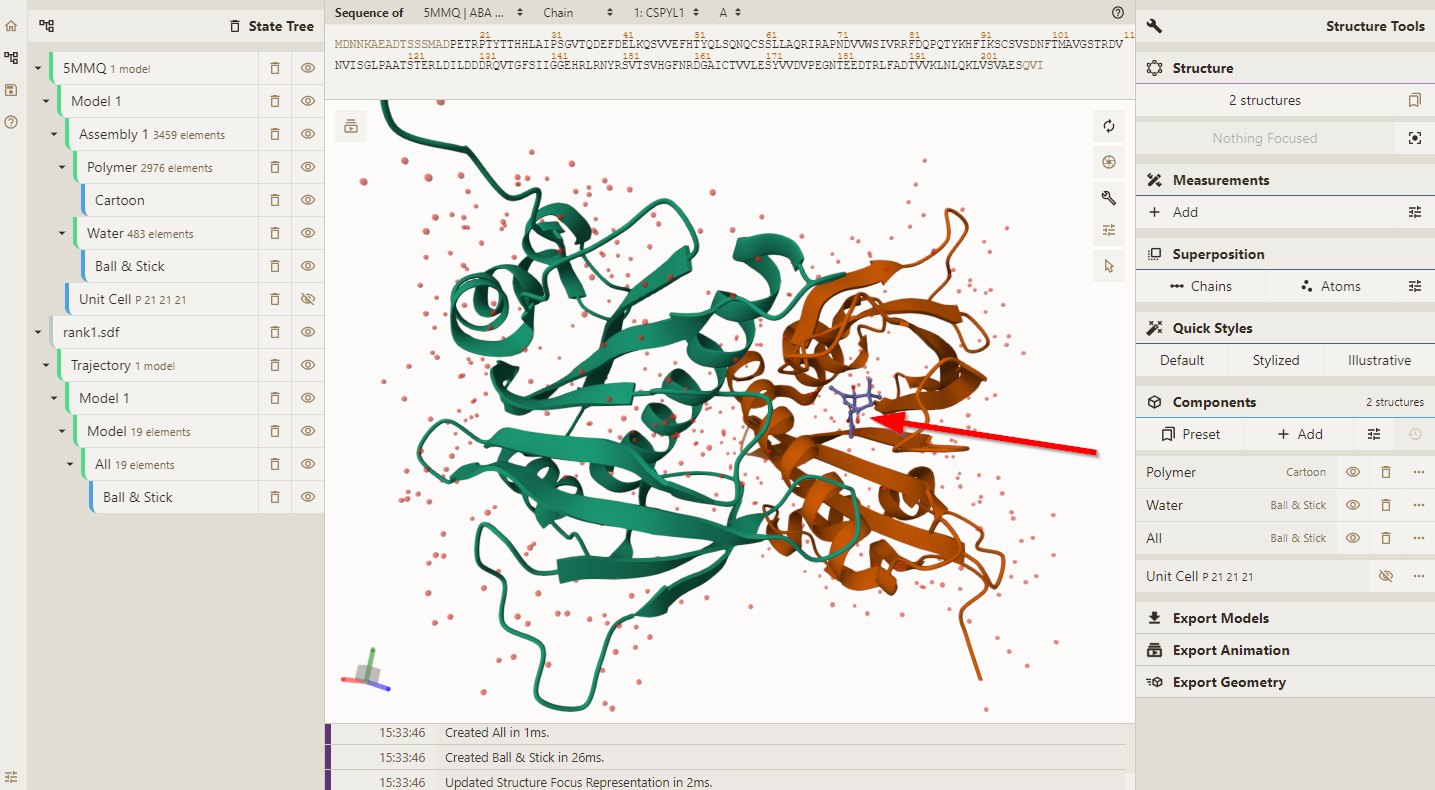

You can see how tightly the small molecule is predicted to bind to the protein.

For more on how to use the Molstar viewer, check out the [Molstar documentation](https://molstar.org/viewer-docs/).

Congratulations, you've downloaded PLEX and run a docking tool!

This analysis demonstrated molecular docking of abscisic acid (ABA) to its receptor in oranges. You can learn more about how this receptor was identified and the potential implications of modeling  it's structural properties here: [Orange trees and their ‘brain-shaped’ protein](https://www.ebi.ac.uk/pdbe/news/orange-trees-and-their-brain-shaped-protein)

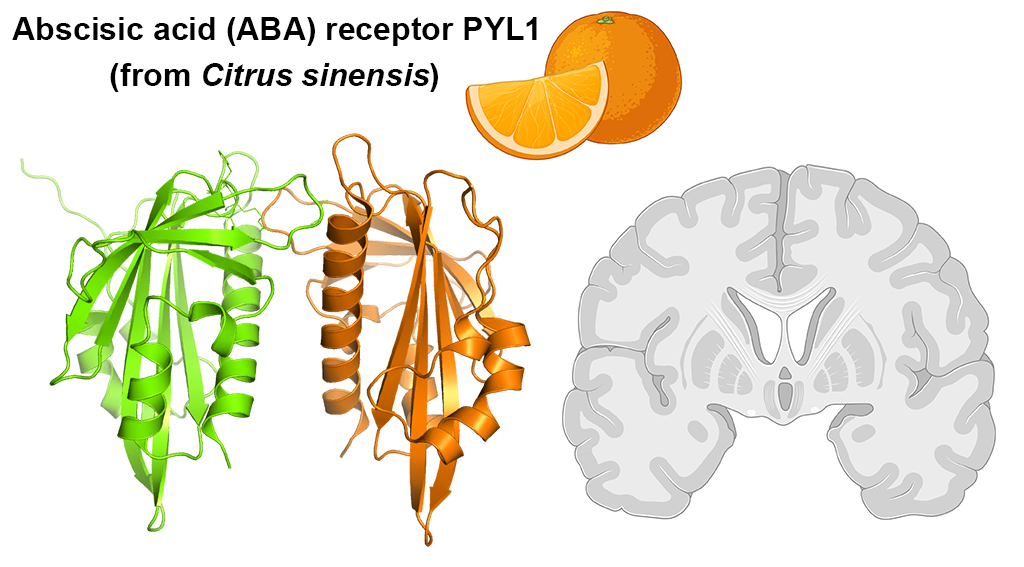

**Fig1. Abscisic acid (ABA) receptor PYL1**

PYL1 is a plant hormone binding protein that has been described as ‘brain-shaped’ (PDB ID: 5mmq; 1). The atoms that compose the protein are being shown with secondary structure representation (i.e. β-sheet with α-helices). The protein has two subunits shown in orange and green.


---

We've just completed a molecular docking run starting from a small molecule `.
sdf` file and a protein structure coordinate `.pdb` file.

If you'd like to investigate the results further, you can explore the CID of the IO JSON, which points to all input and output data from running DiffDock.

### Software License Information

Both PLEX and DiffDock are distributed under the MIT License.
* [PLEX](https://github.com/labdao/plex/blob/main/LICENSE.md)
* [DiffDock](https://github.com/gcorso/DiffDock/blob/main/LICENSE)

# Optional: Generating An On-Chain "Proof of Science" NFT

---

This section demonstrates how to create a publicly verifiable record of your work.

Finally, we can demonstrate the benefits of using distributed storage and compute by producing an on-chain artefact. The current collection of tokens can be viewed on the current [NFT contract deployed on opensea](https://testnets.opensea.io/collection/unidentified-contract-23817).

In [6]:
from plex import plex_mint

os.environ["RECIPIENT_WALLET"] = "0x66CD14267fb5a1609496CdC37eB55E6FE3f59C75" # enter your wallet address 0x64B...
os.environ["AUTOTASK_WEBHOOK"] = "https://api.defender.openzeppelin.com/autotasks/e15b3f39-28f8-4d30-9bf3-5d569bdf2e78/runs/webhook/8315d17c-c493-4d04-a257-79209f95bb64/2gmqi9SRRAQMoy1SRdktai"

nft_cid = plex_mint(completed_io_cid)

Plex version (v0.8.4) up to date.
Preparing NFT metadata...
Uploading NFT metadata to IPFS...
NFT metadata uploaded to IPFS: ipfs://QmYDKVyR9258rTWCzWrYbUx4bfDCXvzkvCMbPmuSn5xqJq
Triggering minting process via Defender Autotask...
🌱🌱🌱🌱🌱
Minting process successful.
Thank you for making science more reproducible, open, and collaborative!
You can view your ProofOfScience NFT at https://testnets.opensea.io/.
🌱🌱🌱🌱🌱
